In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#load in cleaned rainfall_output data
df = pd.read_csv("../Data/Rainfall Complete/rainfall_complete.csv")
df.head()

,Source Address,Date,Latitude,Longitude,Rainfall
0,43020,1/1/2022,29.554639,-95.025513,0.0
1,43021,1/1/2022,29.543475,-95.217353,0.0
2,43022,1/1/2022,29.507960,-95.117410,0.0
3,43023,1/1/2022,29.513234,-95.222531,0.0
4,43024,1/1/2022,29.517555,-95.179061,0.0


In [6]:
#finding standard deviation of rainfall by zip code by month
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.to_period('M')
df = df.rename(columns={'Source Address': 'Zipcode'})
total_monthly_rainfall_by_zipcode = df.groupby(['Zipcode', 'Month'], as_index=False)['Rainfall'].sum()
total_monthly_rainfall_by_zipcode["Month"] = total_monthly_rainfall_by_zipcode["Month"].astype(str)
total_monthly_rainfall_by_zipcode['Rainfall'].describe()


count    5580.000000
mean        3.671656
std         2.794481
min         0.000000
25%         1.720000
50%         2.960000
75%         4.880000
max        24.120000
Name: Rainfall, dtype: float64

In [4]:
#refactor the date column and group by month
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.to_period('M')
total_monthly_rainfall = df.groupby('Month', as_index=False)['Rainfall'].sum()
total_monthly_rainfall["Month"] = total_monthly_rainfall["Month"].astype(str)
total_monthly_rainfall


,Month,Rainfall
0,2022-01,728.92
1,2022-02,182.12
2,2022-03,521.76
3,2022-04,385.04
4,2022-05,651.24
5,2022-06,108.60
6,2022-07,390.60
7,2022-08,1338.12
8,2022-09,368.08
9,2022-10,448.92


In [ ]:
# read in excel data
public_data = pd.read_excel('../Data/BCW Public and Private Original Data/Raw Excel Public and Private Data/public_data.xlsx')
private_data2123 = pd.read_excel('../Data/BCW Public and Private Original Data/Raw Excel Public and Private Data/private_2123.xlsx')
private_data2324 = pd.read_excel('../Data/BCW Public and Private Original Data/Raw Excel Public and Private Data/private_2324.xlsx')

# combine old & new private data, change column name to Start_Date for easier merging
private_data = pd.concat([private_data2123, private_data2324])

private_data.rename(columns={"Date of WW\nRelease": "Start_Date"}, inplace=True)
private_data.drop('Zipcode', axis=1, inplace=True)

#private_data.head()
#public_data.head()



FileNotFoundError: [Errno 2] No such file or directory: '../public_data.xlsx'

In [18]:
# Convert date columns to datetime format
public_data["Start_Date"] = pd.to_datetime(public_data["Start_Date"], errors='coerce')
private_data["Start_Date"] = pd.to_datetime(private_data["Start_Date"], errors='coerce')

# Aggregate overflows per month
public_data["Month"] = public_data["Start_Date"].dt.to_period("M")
private_data["Month"] = private_data["Start_Date"].dt.to_period("M")

public_counts = public_data.groupby("Month").size().reset_index(name="Public Overflows")
private_counts = private_data.groupby("Month").size().reset_index(name="Private Overflows")

# Merge both datasets for visualization
sewage_counts = pd.merge(public_counts, private_counts, on="Month", how="outer").fillna(0)
sewage_counts["Month"] = sewage_counts["Month"].astype(str)

sewage_counts.head()

,Month,Public Overflows,Private Overflows
0,2021-01,2.0,0.0
1,2021-02,3.0,0.0
2,2021-03,1.0,0.0
3,2021-04,97.0,248.0
4,2021-05,127.0,174.0


In [38]:
#merge sewage overflow counts and rainfall totals for visualization
sewage_rainfall = pd.merge(sewage_counts, total_monthly_rainfall, on='Month')
sewage_rainfall = sewage_rainfall[:-5]
sewage_rainfall

,Month,Public Overflows,Private Overflows,Rainfall
0,2022-01,112.0,284.0,728.92
1,2022-02,152.0,322.0,182.12
2,2022-03,169.0,331.0,521.76
3,2022-04,114.0,214.0,385.04
4,2022-05,106.0,184.0,651.24
5,2022-06,55.0,152.0,108.60
6,2022-07,63.0,109.0,390.60
7,2022-08,55.0,108.0,1338.12
8,2022-09,64.0,113.0,368.08
9,2022-10,90.0,116.0,448.92


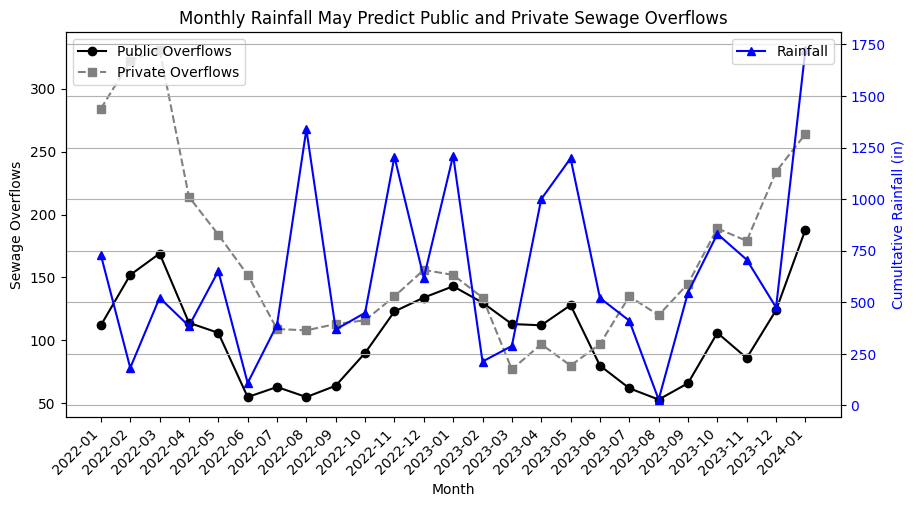

In [ ]:
#full chart

fig, ax1 = plt.subplots(figsize=(10, 5))

#sewage events
ax1.plot(sewage_rainfall['Month'], sewage_rainfall['Public Overflows'], label="Public Overflows", color = "black", marker="o")
ax1.plot(sewage_rainfall['Month'], sewage_rainfall['Private Overflows'], label="Private Overflows", color = "grey", marker="s", linestyle = '--')
ax1.set_xlabel("Month")
ax1.set_ylabel("Sewage Overflows")
ax1.tick_params(axis='y', labelcolor="black")
plt.setp(ax1.get_xticklabels(), rotation=45, ha="right")

#rainfall
ax2 = ax1.twinx()
ax2.plot(sewage_rainfall['Month'], sewage_rainfall['Rainfall'], label="Rainfall", color = "blue", marker="^")
ax2.set_ylabel("Cumultative Rainfall (in)", color="blue")
ax2.tick_params(axis='y', labelcolor="blue")

ax1.legend(loc="upper left")
ax2.legend(loc="upper right")
plt.xticks(rotation=45)
plt.title("Monthly Rainfall May Predict Public and Private Sewage Overflows")
plt.grid()

plt.show()

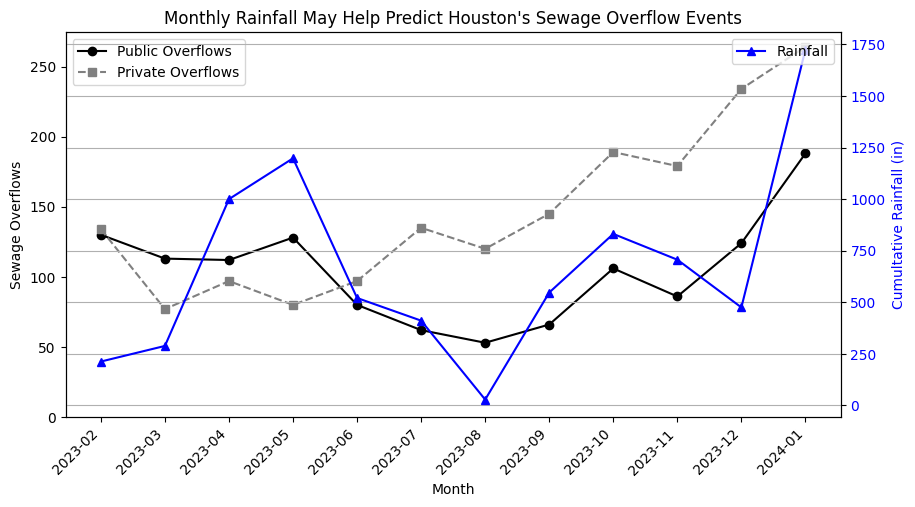

In [46]:
#subset to 2023-02 and onward for the chart

sewage_rainfall_2324 = sewage_rainfall[13:]
sewage_rainfall_2324

fig, ax1 = plt.subplots(figsize=(10, 5))

#sewage events
ax1.plot(sewage_rainfall_2324['Month'], sewage_rainfall_2324['Public Overflows'], label="Public Overflows", color = "black", marker="o")
ax1.plot(sewage_rainfall_2324['Month'], sewage_rainfall_2324['Private Overflows'], label="Private Overflows", color = "grey", marker="s", linestyle = '--')
ax1.set_xlabel("Month")
ax1.set_ylabel("Sewage Overflows")
ax1.tick_params(axis='y', labelcolor="black")
plt.setp(ax1.get_xticklabels(), rotation=45, ha="right")
ax1.set_ylim(0, None)

#rainfall
ax2 = ax1.twinx()
ax2.plot(sewage_rainfall_2324['Month'], sewage_rainfall_2324['Rainfall'], label="Rainfall", color = "blue", marker="^")
ax2.set_ylabel("Cumultative Rainfall (in)", color="blue")
ax2.tick_params(axis='y', labelcolor="blue")

ax1.legend(loc="upper left")
ax2.legend(loc="upper right")
plt.xticks(rotation=45)
plt.title("Monthly Rainfall May Help Predict Houston's Sewage Overflow Events")
plt.grid()

plt.show()

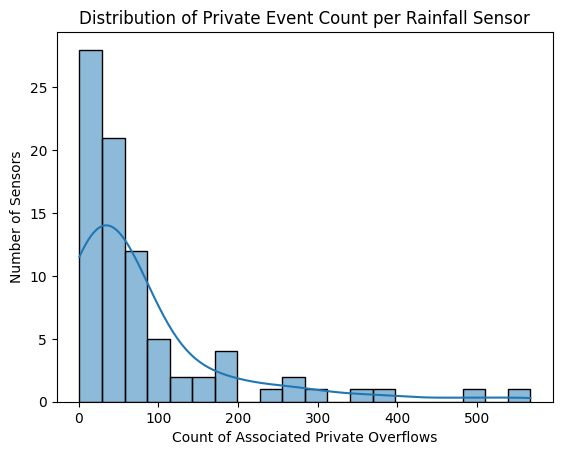

Closest Sensor
43044    567
43130    484
43046    390
43182    353
43087    289
43069    274
43152    257
43153    247
43043    190
43070    189
dtype: int64


In [18]:
df_private_sensors = pd.read_csv('private_data_with_sensor.csv')
grouped = df_private_sensors.groupby('Closest Sensor').size()

# Plot histogram
sns.histplot(grouped, bins=20, kde=True, edgecolor='black')

# Labels and title
plt.xlabel('Count of Associated Private Overflows')
plt.ylabel('Number of Sensors')
plt.title('Distribution of Private Event Count per Rainfall Sensor')

plt.show()

top_sensors = grouped.nlargest(10)
print(top_sensors)
